In [1]:
#imported dependancies
from sqlalchemy import create_engine
import pandas as pd
import matplotlib as plt

In [51]:
#created engine to connect to db
username='postgres'
password='????????'
host='localhost'
port='5432'
db='SQL_HW'

engine=create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db}')
conn=engine.connect()

In [3]:

df=pd.read_sql('select *  from salaries ',conn)

In [4]:
#used queries to find necessary info and created DataFrame
df=pd.read_sql('select * from departments',conn)
df_salarry_two=('select salary from salaries',conn)
df_salaries=pd.read_sql('select * from salaries ',conn)
df_dept_emp=pd.read_sql('select * from dept_emp',conn)
df_employees=pd.read_sql('select * from employees',conn)
df_departments=pd.read_sql('select * from departments',conn)
df_titles=pd.read_sql('select * from titles',conn)

In [18]:

df_titles.head()


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [6]:
df_dept_emp.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [13]:
df_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [8]:
df_salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [21]:
#merged tables together and grouped them by 'title' in order to find avg salary for each title
merged_salaries=pd.merge(df_salaries,df_titles)
final_data=merged_salaries.groupby(['title'])['salary'].mean()

In [28]:
merged_salaries.head()

,emp_no,salary,from_date,to_date,title
0,10015,40000,1992-09-19,1993-08-22,Senior Staff
1,10073,56473,1998-02-02,1998-02-22,Engineer
2,10082,48935,1990-01-03,1990-01-15,Staff
3,10131,48475,1999-09-17,1999-12-06,Engineer
4,10186,40000,1996-12-25,1997-08-16,Staff


In [26]:
#results of data
pd.DataFrame(final_data)

,salary
title,
Assistant Engineer,48362.318078
Engineer,48765.865124
Senior Engineer,48925.505646
Senior Staff,57956.352697
Staff,58083.046735
Technique Leader,48749.153132


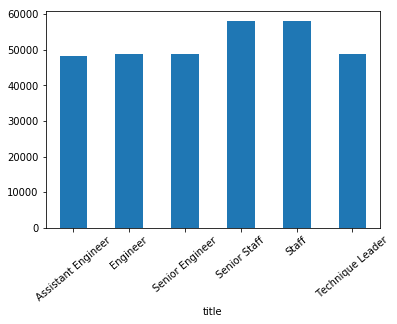

In [49]:
#plotted results
ax = final_data.plot.bar(x='salary', rot=40)
